In [416]:
from selenium import webdriver
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoAlertPresentException
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.common.keys import Keys

import pandas as pd

from pymongo import MongoClient
import pandas as pd

# Requests sends and recieves HTTP requests.
import requests

# Beautiful Soup parses HTML documents in python.
from bs4 import BeautifulSoup

import time
import pprint

import datetime

import matplotlib.pyplot as plt
import numpy as np

In [2]:
webdriver = "/Users/kathrynjohnson/Downloads/chromedriver"

driver = Chrome(webdriver)

login_url = "https://myaccount.nytimes.com/auth/login"

driver.get(login_url)

html_source = driver.page_source

In [3]:
request_url = 'https://www.nytimes.com/crosswords'

driver.get(request_url)

html_source = driver.page_source


In [ ]:
def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

puzzle_dict2019 = {}
start_date = date(2019, 1, 1)
end_date = date(2019, 1, 2)

for single_date in daterange(start_date, end_date):
    url = "https://www.nytimes.com/crosswords/game/daily/" + single_date.strftime("%Y/%m/%d") + "/"
    driver.get(url)
    time.sleep(10)
    clue_element = driver.find_elements_by_class_name("Clue-text--3lZl7")
    clue = [x.text for x in clue_element]
    day_element = driver.find_elements_by_class_name('PuzzleDetails-date--1HNzj')
    for x in day_element:
        date_info = x.text
        date_split = date_info.split(' ')
        day_of_week = date_split[0]
    author_element = driver.find_elements_by_class_name("PuzzleDetails-byline--16J5w")
    for x in author_element:
        if x.text[0] is 'T':
            byline = x.text[16:]
            byline_split = byline.split('Edited')
            author = byline_split[0]
        elif x.text[0] is '"':
            byline = x.text.replace('"', ' ')
            byline2 = byline.replace('Edited ', ' ')
            byline3 = byline2.replace('by', 'By')
            byline_split = byline3.split('By ')
            author = byline_split[1]
    timer_element = driver.find_elements_by_class_name('timer-count')
    timer = [x.text for x in timer_element]
    puzzle_dict2019[single_date.strftime("%Y-%m-%d")] = (timer[0], day_of_week, author, clue)
    time.sleep(10)

In [26]:
df2016 = pd.DataFrame.from_dict(puzzle_dict2016, orient='index', columns=['solve_time', 'author', 'clues'])

In [27]:
df2016

,solve_time,author,clues
2016-01-01,[10:14],DAVID STEINBERG,"[Prominent feature of dubstep music, Try to av..."
2016-01-02,[11:17],DAVID PHILLIPS,"[Surf stuff, Dangerous fall, One with a pouch,..."
2016-01-03,[22:40],DAVID WOOLF,"[Malicious computer programs, Essence, Chippen..."
2016-01-04,[9:25],HERRE SCHOUWERWOU,"[Small jump, Burrito alternative, Lion's sound..."
2016-01-05,[10:46],JIM HOLLAND,"[Marital ___, Food thickener, Mineral spring, ..."
...,...,...,...
2016-12-27,[7:57],HERRE SCHOUWERWOU,"[Tease good-naturedly, Knock down a notch, Old..."
2016-12-28,[13:21],BRENDAN EMMETT QUIGLEY,"[Some pears, Joyous wedding dance, Lethal inje..."
2016-12-29,[16:20],KEVAN CHOSET,"[Many a SpaceX worker: Abbr., Small drum, Year..."
2016-12-30,[25:53],PATRICK BERRY,"[It's soft and sweet, Turpentine source, Possi..."


In [81]:
def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

puzzle_dict2019 = {}
start_date = date(2019, 1, 1)
end_date = date(2019, 1, 2)

for single_date in daterange(start_date, end_date):
    url = "https://www.nytimes.com/crosswords/game/daily/" + single_date.strftime("%Y/%m/%d") + "/"
    driver.get(url)
    time.sleep(10)
    clue_element = driver.find_elements_by_class_name("Clue-text--3lZl7")
    clue = [x.text for x in clue_element]
    day_element = driver.find_elements_by_class_name('PuzzleDetails-date--1HNzj')
    for x in day_element:
        date_info = x.text
        date_split = date_info.split(' ')
        day_of_week = date_split[0]
    author_element = driver.find_elements_by_class_name("PuzzleDetails-byline--16J5w")
    for x in author_element:
        if x.text[0] is 'T':
            byline = x.text[16:]
            byline_split = byline.split('Edited')
            author = byline_split[0]
        elif x.text[0] is '"':
            byline = x.text.replace('"', ' ')
            byline2 = byline.replace('Edited ', ' ')
            byline3 = byline2.replace('by', 'By')
            byline_split = byline3.split('By ')
            author = byline_split[1]
    timer_element = driver.find_elements_by_class_name('timer-count')
    timer = [x.text for x in timer_element]
    puzzle_dict2019[single_date.strftime("%Y-%m-%d")] = (timer[0], day_of_week, author, clue)
    time.sleep(10)

In [69]:
df1 = pd.DataFrame.from_dict(puzzle_dict, orient='index', columns=['solve_time', 'author', 'clues'])

NameError: name 'puzzle_dict' is not defined

In [71]:
df1 = pd.read_csv('1718.csv')

In [72]:
df17_18 = df1.drop(columns=['Unnamed: 0'], axis = 1)

In [73]:
df17_18['solve_time'] = formatted_times

In [74]:
df17_18

,Unnamed: 0.1,solve_time,author,clues,day
0,2017-01-01,00:33:53,MATTHEW SEWELL,"['Sponged', 'Asylum', 'Takes from page to scre...",Sunday
1,2017-01-02,00:08:50,CHUCK DEODENE,"[""Leatherworker's tool"", 'Wrath', 'Sauce often...",Monday
2,2017-01-03,00:10:30,MICHAEL SHTEYMAN,"['Misgiving', 'Small quarrel', 'Leader from th...",Tuesday
3,2017-01-04,00:20:17,SAMUEL A. DONALDSON,"['Bee ball?', 'Somewhat', ""Historian's focus"",...",Wednesday
4,2017-01-05,00:18:11,ED SESSA,"['Half of a Wall Street firm since 1882', 'One...",Thursday
...,...,...,...,...,...
725,2018-12-27,00:11:10,JEFF CHEN and MARY LOU GUIZZO,"['___ billiards, game on a pocketless table', ...",Thursday
726,2018-12-28,00:12:53,DAVID STEINBERG,"['Dominant figure', 'High-end Italian sports c...",Friday
727,2018-12-29,00:13:49,ROBYN WEINTRAUB,"['First digit', 'Beam at?', '4.93 milliliters:...",Saturday
728,2018-12-30,00:32:25,LUKE VAUGHN,"['Fixture on a ski lodge deck', 'Sound quality...",Sunday


In [79]:
df17_18['solve_time'] = pd.to_datetime(df17_18['solve_time'],format= '%H:%M:%S' ).dt.time


In [80]:
df17_18

,Unnamed: 0.1,solve_time,author,clues,day
0,2017-01-01,00:33:53,MATTHEW SEWELL,"['Sponged', 'Asylum', 'Takes from page to scre...",Sunday
1,2017-01-02,00:08:50,CHUCK DEODENE,"[""Leatherworker's tool"", 'Wrath', 'Sauce often...",Monday
2,2017-01-03,00:10:30,MICHAEL SHTEYMAN,"['Misgiving', 'Small quarrel', 'Leader from th...",Tuesday
3,2017-01-04,00:20:17,SAMUEL A. DONALDSON,"['Bee ball?', 'Somewhat', ""Historian's focus"",...",Wednesday
4,2017-01-05,00:18:11,ED SESSA,"['Half of a Wall Street firm since 1882', 'One...",Thursday
...,...,...,...,...,...
725,2018-12-27,00:11:10,JEFF CHEN and MARY LOU GUIZZO,"['___ billiards, game on a pocketless table', ...",Thursday
726,2018-12-28,00:12:53,DAVID STEINBERG,"['Dominant figure', 'High-end Italian sports c...",Friday
727,2018-12-29,00:13:49,ROBYN WEINTRAUB,"['First digit', 'Beam at?', '4.93 milliliters:...",Saturday
728,2018-12-30,00:32:25,LUKE VAUGHN,"['Fixture on a ski lodge deck', 'Sound quality...",Sunday


In [4]:
%%time 

def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

puzzle_dict1516 = {}
start_date = date(2015, 1, 1)
end_date = date(2017, 1, 1)

for single_date in daterange(start_date, end_date):
    url = "https://www.nytimes.com/crosswords/game/daily/" + single_date.strftime("%Y/%m/%d") + "/"
    driver.get(url)
    clue_element = driver.find_elements_by_class_name("Clue-text--3lZl7")
    clue = [x.text for x in clue_element]
    day_element = driver.find_elements_by_class_name('PuzzleDetails-date--1HNzj')
    for x in day_element:
        date_info = x.text
        date_split = date_info.split(' ')
        day_of_week = date_split[0]
        author_element = driver.find_elements_by_class_name("PuzzleDetails-byline--16J5w")
    for x in author_element:
        if x.text[0] is 'T':
            byline = x.text[16:]
            byline_split = byline.split('Edited')
            author = byline_split[0]
        elif x.text[0] is '"':
            byline = x.text.replace('"', ' ')
            byline2 = byline.replace('Edited ', ' ')
            byline3 = byline2.replace('by', 'By')
            byline_split = byline3.split('By ')
            author = byline_split[1]
    timer_element = driver.find_elements_by_class_name('timer-count')
    timer = [x.text for x in timer_element]
    puzzle_dict1516[single_date.strftime("%Y-%m-%d")] = (time, day_of_week, author, clue)
    time.sleep(12)
    


CPU times: user 1min 4s, sys: 4.67 s, total: 1min 8s
Wall time: 3h 23min 34s


In [6]:
df2 = pd.DataFrame.from_dict(puzzle_dict1516, orient='index', columns=b['solve_time', 'day_of_week', 'author', 'clues'])

In [7]:
df2

,solve_time,day_of_week,author,clues
2015-01-01,<module 'time' (built-in)>,Thursday,JEFF CHEN and JILL DENNY,"[Person close to 100?, Kind of game or line, B..."
2015-01-02,<module 'time' (built-in)>,Friday,DAVID STEINBERG,"[One at the head of the class, informally, ""Fe..."
2015-01-03,<module 'time' (built-in)>,Saturday,SAM EZERSKY,"[Bollix, Rough selection?, 1975 Golden Globe w..."
2015-01-04,<module 'time' (built-in)>,Sunday,FINN VIGELAND,"[The ""1"" of 1/4, Org. portrayed in ""American H..."
2015-01-05,<module 'time' (built-in)>,Monday,JOHN GUZZETTA,"[More achy, Item in a pod, Helpful website fea..."
...,...,...,...,...
2016-12-27,<module 'time' (built-in)>,Tuesday,HERRE SCHOUWERWOU,"[Tease good-naturedly, Knock down a notch, Old..."
2016-12-28,<module 'time' (built-in)>,Wednesday,BRENDAN EMMETT QUIGLEY,"[Some pears, Joyous wedding dance, Lethal inje..."
2016-12-29,<module 'time' (built-in)>,Thursday,KEVAN CHOSET,"[Many a SpaceX worker: Abbr., Small drum, Year..."
2016-12-30,<module 'time' (built-in)>,Friday,PATRICK BERRY,"[It's soft and sweet, Turpentine source, Possi..."


In [ ]:
df2016 = pd.DataFrame.from_dict(puzzle_dict2016, orient='index', columns=['solve_time', 'author', 'clues'])

df2016

In [28]:
df2016.to_csv('df2016.csv')

In [16]:
df2.to_csv('df2015and2016.csv')

In [18]:
df1

,Unnamed: 0,Unnamed: 0.1,solve_time,author,clues,day
0,0,2017-01-01,33:53,MATTHEW SEWELL,"['Sponged', 'Asylum', 'Takes from page to scre...",Sunday
1,1,2017-01-02,8:50,CHUCK DEODENE,"[""Leatherworker's tool"", 'Wrath', 'Sauce often...",Monday
2,2,2017-01-03,10:30,MICHAEL SHTEYMAN,"['Misgiving', 'Small quarrel', 'Leader from th...",Tuesday
3,3,2017-01-04,20:17,SAMUEL A. DONALDSON,"['Bee ball?', 'Somewhat', ""Historian's focus"",...",Wednesday
4,4,2017-01-05,18:11,ED SESSA,"['Half of a Wall Street firm since 1882', 'One...",Thursday
...,...,...,...,...,...,...
725,725,2018-12-27,11:10,JEFF CHEN and MARY LOU GUIZZO,"['___ billiards, game on a pocketless table', ...",Thursday
726,726,2018-12-28,12:53,DAVID STEINBERG,"['Dominant figure', 'High-end Italian sports c...",Friday
727,727,2018-12-29,13:49,ROBYN WEINTRAUB,"['First digit', 'Beam at?', '4.93 milliliters:...",Saturday
728,728,2018-12-30,32:25,LUKE VAUGHN,"['Fixture on a ski lodge deck', 'Sound quality...",Sunday


In [62]:
solve_times = df1['solve_time'].to_list()

In [78]:
formatted_times = []
times_formatted = []
for i in solve_times:
    if len(i) == 4:
        formatted_times.append('00:0' + i)
    elif len(i) == 5:
        formatted_times.append('00:' + i)
    elif len(i) == 7:
        formatted_times.append('0' + i)
    else:
        formatted_times.append(i)

for x in formatted_times:
    times_formatted.append(time.strptime(x[, format='%H:%M:%S'])



SyntaxError: invalid syntax (<ipython-input-78-05cfaeae90c7>, line 14)

In [98]:
test_url2 = 'https://www.nytimes.com/crosswords/game/daily/2020/04/01'

driver.get(test_url2)

html_source = driver.page_source

author_element = driver.find_elements_by_class_name("PuzzleDetails-byline--16J5w")
for x in author_element:
    if x.text[0] is 'T':
        byline = x.text[16:]
        byline_split = byline.split('Edited')
        author = byline_split[0]
    elif x.text[0] is '"':
        byline = x.text.replace('"', ' ')
        byline2 = byline.replace('Edited ', ' ')
        byline3 = byline2.replace('by', 'By')
        byline_split = byline3.split('By ')
        author = byline_split[1]
author

'JOHN FICARRA AND PATRICK MERRELL'

In [50]:
test_url2 = 'https://www.nytimes.com/crosswords/game/daily/2020/04/01'

driver.get(test_url2)

html_source = driver.page_source

html_source

day_element = driver.find_elements_by_class_name('PuzzleDetails-date--1HNzj')
for x in day_element:
    date_info = x.text
    date_split = date_info.split(' ')
    day_of_week = date_split[0]

day_of_week

'Wednesday'

In [62]:
#making a day of the week list to add to an existing pandas df

days_list = []
for i in range(105):
    days_list.append('Sunday')
    days_list.append('Monday')
    days_list.append('Tuesday')
    days_list.append('Wednesday')
    days_list.append('Thursday')
    days_list.append('Friday')
    days_list.append('Saturday')

days_list = days_list[0:730]

len(days_list)
days_list

['Sunday',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Sunday',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Sunday',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Sunday',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Sunday',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Sunday',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Sunday',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Sunday',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Sunday',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Sunday',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Sunday',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Sunday',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Fr

In [94]:
df1 = pd.read_csv('firstdf.csv')

In [95]:
df1['day'] = days_list

In [96]:
df1

,Unnamed: 0,solve_time,author,clues,day
0,2017-01-01,33:53,MATTHEW SEWELL,"['Sponged', 'Asylum', 'Takes from page to scre...",Sunday
1,2017-01-02,8:50,CHUCK DEODENE,"[""Leatherworker's tool"", 'Wrath', 'Sauce often...",Monday
2,2017-01-03,10:30,MICHAEL SHTEYMAN,"['Misgiving', 'Small quarrel', 'Leader from th...",Tuesday
3,2017-01-04,20:17,SAMUEL A. DONALDSON,"['Bee ball?', 'Somewhat', ""Historian's focus"",...",Wednesday
4,2017-01-05,18:11,ED SESSA,"['Half of a Wall Street firm since 1882', 'One...",Thursday
...,...,...,...,...,...
725,2018-12-27,11:10,JEFF CHEN and MARY LOU GUIZZO,"['___ billiards, game on a pocketless table', ...",Thursday
726,2018-12-28,12:53,DAVID STEINBERG,"['Dominant figure', 'High-end Italian sports c...",Friday
727,2018-12-29,13:49,ROBYN WEINTRAUB,"['First digit', 'Beam at?', '4.93 milliliters:...",Saturday
728,2018-12-30,32:25,LUKE VAUGHN,"['Fixture on a ski lodge deck', 'Sound quality...",Sunday


In [93]:
df1

,Unnamed: 0,solve_time,author,clues,day
0,2017-01-01,33:53,MATTHEW SEWELL,"['Sponged', 'Asylum', 'Takes from page to scre...",Sunday
1,2017-01-02,8:50,CHUCK DEODENE,"[""Leatherworker's tool"", 'Wrath', 'Sauce often...",Monday
2,2017-01-03,10:30,MICHAEL SHTEYMAN,"['Misgiving', 'Small quarrel', 'Leader from th...",Tuesday
3,2017-01-04,20:17,SAMUEL A. DONALDSON,"['Bee ball?', 'Somewhat', ""Historian's focus"",...",Wednesday
4,2017-01-05,18:11,ED SESSA,"['Half of a Wall Street firm since 1882', 'One...",Thursday
...,...,...,...,...,...
725,2018-12-27,11:10,JEFF CHEN and MARY LOU GUIZZO,"['___ billiards, game on a pocketless table', ...",Thursday
726,2018-12-28,12:53,DAVID STEINBERG,"['Dominant figure', 'High-end Italian sports c...",Friday
727,2018-12-29,13:49,ROBYN WEINTRAUB,"['First digit', 'Beam at?', '4.93 milliliters:...",Saturday
728,2018-12-30,32:25,LUKE VAUGHN,"['Fixture on a ski lodge deck', 'Sound quality...",Sunday


In [97]:
df1.to_csv('1718.csv')

In [291]:
def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

puzzle_dict = {}
start_date = date(2015, 1, 1)
end_date = date(2017, 1, 1)

for single_date in daterange(start_date, end_date):
    #tell selenium to access the site and wait for it to load
    url = "https://www.nytimes.com/crosswords/game/daily/" + single_date.strftime("%Y/%m/%d") + "/"
    driver.get(url)
    time.sleep(10)
    
    #get all the clues and return them in a list
    clue_element = driver.find_elements_by_class_name("Clue-text--3lZl7")
    clue = [x.text for x in clue_element]
    
    #get the day of the week from the puzzle details
    day_element = driver.find_elements_by_class_name('PuzzleDetails-date--1HNzj')
    for x in day_element:
        date_info = x.text
        date_split = date_info.split(' ')
        day_of_week = date_split[0]
    author_element = driver.find_elements_by_class_name("PuzzleDetails-byline--16J5w")
    
    #get the author of the puzzle, parsing will be based on whether puzzle has a special title
    for x in author_element:
        if x.text[0] is 'T':
            byline = x.text[16:]
            byline_split = byline.split('Edited')
            author = byline_split[0]
        elif x.text[0] is '"':
            byline = x.text.replace('"', ' ')
            byline2 = byline.replace('Edited ', ' ')
            byline3 = byline2.replace('by', 'By')
            byline_split = byline3.split('By ')
            author = byline_split[1]
    
    #get the solve time and format it
    timer_element = driver.find_elements_by_class_name('timer-count')
    for x in timer_element:
        if len(x.text) == 4:
            timer = '00:0' + x.text
        elif len(x.text) == 5:
            timer = '00:' + x.text
        elif len(x.text) == 7:
            timer = '0' + x.text
        else:
            timer = x.text
    
    #convert timer to seconds
    date_time = datetime.datetime.strptime(timer, "%H:%M:%S")
    a_timedelta = date_time - datetime.datetime(1900, 1, 1)
    seconds = a_timedelta.total_seconds()
    
    #return all of the data in dictionary with the puzzle date as the key
    puzzle_dict[single_date.strftime("%Y-%m-%d")] = (seconds, day_of_week, author, clue)
    
    #tell selenium to wait a few more seconds before the next pull
    time.sleep(5)


In [292]:
df = pd.DataFrame.from_dict(puzzle_dict, orient='index', columns=['solve_secs', 'day', 'author', 'clues'])

In [293]:
df

,solve_secs,day,author,clues
2015-01-01,584.0,Thursday,JEFF CHEN and JILL DENNY,"[Person close to 100?, Kind of game or line, B..."
2015-01-02,748.0,Friday,DAVID STEINBERG,"[One at the head of the class, informally, ""Fe..."
2015-01-03,736.0,Saturday,SAM EZERSKY,"[Bollix, Rough selection?, 1975 Golden Globe w..."
2015-01-04,1151.0,Sunday,FINN VIGELAND,"[The ""1"" of 1/4, Org. portrayed in ""American H..."
2015-01-05,423.0,Monday,JOHN GUZZETTA,"[More achy, Item in a pod, Helpful website fea..."
...,...,...,...,...
2016-12-27,477.0,Tuesday,HERRE SCHOUWERWOU,"[Tease good-naturedly, Knock down a notch, Old..."
2016-12-28,801.0,Wednesday,BRENDAN EMMETT QUIGLEY,"[Some pears, Joyous wedding dance, Lethal inje..."
2016-12-29,980.0,Thursday,KEVAN CHOSET,"[Many a SpaceX worker: Abbr., Small drum, Year..."
2016-12-30,1553.0,Friday,PATRICK BERRY,"[It's soft and sweet, Turpentine source, Possi..."


In [294]:
df.to_csv('puzzle15_16.csv')

In [295]:
df1 = pd.read_csv('puzzle15_16.csv')

In [297]:
df1 = df1.rename(columns={'Unnamed: 0':'date'})

In [298]:
df1

,date,solve_secs,day,author,clues
0,2015-01-01,584.0,Thursday,JEFF CHEN and JILL DENNY,"['Person close to 100?', 'Kind of game or line..."
1,2015-01-02,748.0,Friday,DAVID STEINBERG,"['One at the head of the class, informally', '..."
2,2015-01-03,736.0,Saturday,SAM EZERSKY,"['Bollix', 'Rough selection?', '1975 Golden Gl..."
3,2015-01-04,1151.0,Sunday,FINN VIGELAND,"['The ""1"" of 1/4', 'Org. portrayed in ""America..."
4,2015-01-05,423.0,Monday,JOHN GUZZETTA,"['More achy', 'Item in a pod', 'Helpful websit..."
...,...,...,...,...,...
726,2016-12-27,477.0,Tuesday,HERRE SCHOUWERWOU,"['Tease good-naturedly', 'Knock down a notch',..."
727,2016-12-28,801.0,Wednesday,BRENDAN EMMETT QUIGLEY,"['Some pears', 'Joyous wedding dance', 'Lethal..."
728,2016-12-29,980.0,Thursday,KEVAN CHOSET,"['Many a SpaceX worker: Abbr.', 'Small drum', ..."
729,2016-12-30,1553.0,Friday,PATRICK BERRY,"[""It's soft and sweet"", 'Turpentine source', '..."


In [91]:
df['solve_time'] = pd.to_datetime(df['solve_time'],format= '%H:%M:%S' ).dt.time


In [92]:
df

,solve_time,day_of_week,author,clues
2019-01-01,00:13:06,Tuesday,GARY CEE,"[First victim of sibling rivalry, ___ Newton (..."
2019-01-02,00:13:06,Tuesday,GARY CEE,[]
2019-01-03,00:13:32,Thursday,TIMOTHY POLIN,"[Got the attention of, Followers of the Baal S..."
2019-01-04,00:13:57,Friday,NEIL PADRICK WILSON,"[Big affair, Disarray, Certain Mideast native,..."
2019-01-05,00:18:50,Saturday,ANDREW ZHOU,"[___ shoes (ballet wear), Museum installations..."
2019-01-06,00:31:28,Sunday,ZHOUQIN BURNIKEL,"[19,000+-foot Peruvian volcano, Husband of Lar..."
2019-01-07,00:08:15,Monday,ANDREW KINGSLEY,"[___ San Lucas (Baja resort city), Chew the fa..."
2019-01-08,00:05:59,Tuesday,FREDDIE CHENG,"[Baker's dozen?, Wild feline, Path of the tip ..."
2019-01-09,00:13:13,Wednesday,TRENTON CHARLSON,"[Gold, frankincense and myrrh, famously, Fleet..."
2019-01-10,00:16:21,Thursday,DEREK BOWMAN and JEFF SLUTZKY,"[Italian scooter, Endurance, Glimpses, Like a ..."


In [96]:
time_string = "01:01:09"

date_time = datetime.datetime.strptime(time_string, "%H:%M:%S")

a_timedelta = date_time - datetime.datetime(1900, 1, 1)
seconds = a_timedelta.total_seconds()

seconds

3669.0

In [ ]:
def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

In [107]:
solve_times = df17_18['solve_time'].to_list()

In [108]:
solve_times

[datetime.time(0, 33, 53),
 datetime.time(0, 8, 50),
 datetime.time(0, 10, 30),
 datetime.time(0, 20, 17),
 datetime.time(0, 18, 11),
 datetime.time(0, 22, 28),
 datetime.time(0, 20, 43),
 datetime.time(0, 31, 44),
 datetime.time(0, 7, 42),
 datetime.time(0, 15, 26),
 datetime.time(0, 19, 21),
 datetime.time(0, 14, 31),
 datetime.time(0, 23, 11),
 datetime.time(0, 23, 21),
 datetime.time(0, 30, 14),
 datetime.time(0, 10, 54),
 datetime.time(0, 13, 52),
 datetime.time(0, 8, 39),
 datetime.time(0, 23, 5),
 datetime.time(0, 22, 56),
 datetime.time(0, 24, 11),
 datetime.time(0, 38, 38),
 datetime.time(0, 9, 36),
 datetime.time(0, 14, 2),
 datetime.time(0, 21, 21),
 datetime.time(0, 19, 4),
 datetime.time(0, 17, 23),
 datetime.time(0, 24, 35),
 datetime.time(0, 28, 35),
 datetime.time(0, 10, 4),
 datetime.time(0, 25, 50),
 datetime.time(0, 14, 28),
 datetime.time(0, 20, 21),
 datetime.time(0, 22, 26),
 datetime.time(0, 22, 21),
 datetime.time(0, 30, 20),
 datetime.time(0, 9, 5),
 datetime.t

In [110]:
df = pd.read_csv('1718.csv')

In [113]:
solve_times = df['solve_time'].to_list()

In [114]:
solve_times

['33:53',
 '8:50',
 '10:30',
 '20:17',
 '18:11',
 '22:28',
 '20:43',
 '31:44',
 '7:42',
 '15:26',
 '19:21',
 '14:31',
 '23:11',
 '23:21',
 '30:14',
 '10:54',
 '13:52',
 '8:39',
 '23:05',
 '22:56',
 '24:11',
 '38:38',
 '9:36',
 '14:02',
 '21:21',
 '19:04',
 '17:23',
 '24:35',
 '28:35',
 '10:04',
 '25:50',
 '14:28',
 '20:21',
 '22:26',
 '22:21',
 '30:20',
 '9:05',
 '13:34',
 '19:53',
 '18:17',
 '14:14',
 '24:43',
 '35:09',
 '11:28',
 '14:41',
 '13:47',
 '17:48',
 '23:13',
 '23:45',
 '34:25',
 '13:25',
 '10:23',
 '14:04',
 '14:12',
 '21:36',
 '22:52',
 '23:37',
 '8:06',
 '17:08',
 '11:00',
 '20:53',
 '22:47',
 '21:52',
 '41:15',
 '12:50',
 '11:13',
 '17:24',
 '13:20',
 '22:46',
 '17:56',
 '35:56',
 '8:34',
 '15:56',
 '18:07',
 '17:01',
 '21:39',
 '23:42',
 '34:40',
 '10:28',
 '24:57',
 '28:18',
 '21:56',
 '24:26',
 '19:11',
 '34:53',
 '10:25',
 '12:23',
 '16:09',
 '22:54',
 '45:59',
 '3:26:39',
 '2:51:55',
 '9:38',
 '14:46',
 '12:26',
 '20:08',
 '25:33',
 '32:58',
 '2:01:41',
 '9:17',
 '1

In [116]:
formatted_times = []

for i in solve_times:
    if len(i) == 4:
        formatted_times.append('00:0' + i)
    elif len(i) == 5:
        formatted_times.append('00:' + i)
    elif len(i) == 7:
        formatted_times.append('0' + i)
    else:
        formatted_times.append(i)

#for x in formatted_times:
   # times_formatted.append(time.strptime(x[, format='%H:%M:%S'])

In [119]:
time_in_seconds = []

for i in formatted_times:
    date_time = datetime.datetime.strptime(i, "%H:%M:%S")
    a_timedelta = date_time - datetime.datetime(1900, 1, 1)
    seconds = a_timedelta.total_seconds()
    time_in_seconds.append(seconds)

In [120]:
df['solve_time'] = time_in_seconds

In [121]:
df

,Unnamed: 0,Unnamed: 0.1,solve_time,author,clues,day
0,0,2017-01-01,2033.0,MATTHEW SEWELL,"['Sponged', 'Asylum', 'Takes from page to scre...",Sunday
1,1,2017-01-02,530.0,CHUCK DEODENE,"[""Leatherworker's tool"", 'Wrath', 'Sauce often...",Monday
2,2,2017-01-03,630.0,MICHAEL SHTEYMAN,"['Misgiving', 'Small quarrel', 'Leader from th...",Tuesday
3,3,2017-01-04,1217.0,SAMUEL A. DONALDSON,"['Bee ball?', 'Somewhat', ""Historian's focus"",...",Wednesday
4,4,2017-01-05,1091.0,ED SESSA,"['Half of a Wall Street firm since 1882', 'One...",Thursday
...,...,...,...,...,...,...
725,725,2018-12-27,670.0,JEFF CHEN and MARY LOU GUIZZO,"['___ billiards, game on a pocketless table', ...",Thursday
726,726,2018-12-28,773.0,DAVID STEINBERG,"['Dominant figure', 'High-end Italian sports c...",Friday
727,727,2018-12-29,829.0,ROBYN WEINTRAUB,"['First digit', 'Beam at?', '4.93 milliliters:...",Saturday
728,728,2018-12-30,1945.0,LUKE VAUGHN,"['Fixture on a ski lodge deck', 'Sound quality...",Sunday


In [122]:
df = df.drop(columns=['Unnamed: 0'], axis = 1)

In [124]:
df = df.rename(columns={'Unnamed: 0.1': 'date'})

In [126]:
df = df.rename(columns={'solve_time':'solve time (seconds)'})

In [127]:
df

,date,solve time (seconds),author,clues,day
0,2017-01-01,2033.0,MATTHEW SEWELL,"['Sponged', 'Asylum', 'Takes from page to scre...",Sunday
1,2017-01-02,530.0,CHUCK DEODENE,"[""Leatherworker's tool"", 'Wrath', 'Sauce often...",Monday
2,2017-01-03,630.0,MICHAEL SHTEYMAN,"['Misgiving', 'Small quarrel', 'Leader from th...",Tuesday
3,2017-01-04,1217.0,SAMUEL A. DONALDSON,"['Bee ball?', 'Somewhat', ""Historian's focus"",...",Wednesday
4,2017-01-05,1091.0,ED SESSA,"['Half of a Wall Street firm since 1882', 'One...",Thursday
...,...,...,...,...,...
725,2018-12-27,670.0,JEFF CHEN and MARY LOU GUIZZO,"['___ billiards, game on a pocketless table', ...",Thursday
726,2018-12-28,773.0,DAVID STEINBERG,"['Dominant figure', 'High-end Italian sports c...",Friday
727,2018-12-29,829.0,ROBYN WEINTRAUB,"['First digit', 'Beam at?', '4.93 milliliters:...",Saturday
728,2018-12-30,1945.0,LUKE VAUGHN,"['Fixture on a ski lodge deck', 'Sound quality...",Sunday


In [128]:
df.to_csv('puzzledata.csv')

In [138]:
df = pd.read_csv('puzzledata.csv')

In [204]:
df = df.drop(columns = 'Unnamed: 0')

In [ ]:
grouped = df.groupby('day')

In [ ]:
times_by_day = grouped.aggregate(np.mean)

In [ ]:
times_by_day

In [ ]:
sorted_days = times_by_day.sort_values('solve time (seconds)')
sorted_days

In [ ]:
sorted_days.plot.bar()

In [136]:
df = pd.read_csv('puzzledata.csv')

In [143]:
df = df[['date', 'solve time (seconds)', 'day', 'author', 'clues']]

In [145]:
df.to_csv('puzzledata1.csv')

In [150]:
df = df.rename(columns={'solve time (seconds)': 'solve_secs'})

In [212]:
df_Sun.reset_index(drop=True, inplace=True)

df_Sun

,date,solve_secs,day,author,clues
0,2017-01-01,2033.0,Sunday,MATTHEW SEWELL,"['Sponged', 'Asylum', 'Takes from page to scre..."
1,2017-01-08,1904.0,Sunday,ERIK AGARD and PETER BRODA,"['Loops in, in a way', 'Goddess with a throne ..."
2,2017-01-15,1814.0,Sunday,JOEL FAGLIANO,"['Kind of kick', 'Product of evaporation', 'Ap..."
3,2017-01-22,2318.0,Sunday,DAN SCHOENHOLZ,"['Inconceivably vast', 'Hard looks', 'Stream, ..."
4,2017-01-29,1715.0,Sunday,JIM HYRES and DAVID STEINBERG,"['One side of a 69-Across showdown', 'Strip of..."
...,...,...,...,...,...
100,2018-12-02,1670.0,Sunday,PAUL COULTER,"[""Tennis judge's cry"", 'Locks in a barn?', 'Ic..."
101,2018-12-09,2467.0,Sunday,ROSS TRUDEAU,"[""Cranky baby's need"", '""Inspector Gadget"" ant..."
102,2018-12-16,1946.0,Sunday,SAM EZERSKY,"['Early wake-up time', ""Title for Iran's Ruhol..."
103,2018-12-23,1427.0,Sunday,DAVID ALFRED BYWATERS,"['English guy', 'Partner in indecision with 5-..."


In [153]:
df.to_csv('puzzledata2.csv')

In [239]:
df = pd.read_csv('puzzledata2.csv')

In [241]:
df = df.drop(columns = 'Unnamed: 0')

In [242]:
df

,date,solve_secs,day,author,clues
0,2017-01-01,2033.0,Sunday,MATTHEW SEWELL,"['Sponged', 'Asylum', 'Takes from page to scre..."
1,2017-01-02,530.0,Monday,CHUCK DEODENE,"[""Leatherworker's tool"", 'Wrath', 'Sauce often..."
2,2017-01-03,630.0,Tuesday,MICHAEL SHTEYMAN,"['Misgiving', 'Small quarrel', 'Leader from th..."
3,2017-01-04,1217.0,Wednesday,SAMUEL A. DONALDSON,"['Bee ball?', 'Somewhat', ""Historian's focus"",..."
4,2017-01-05,1091.0,Thursday,ED SESSA,"['Half of a Wall Street firm since 1882', 'One..."
...,...,...,...,...,...
725,2018-12-27,670.0,Thursday,JEFF CHEN and MARY LOU GUIZZO,"['___ billiards, game on a pocketless table', ..."
726,2018-12-28,773.0,Friday,DAVID STEINBERG,"['Dominant figure', 'High-end Italian sports c..."
727,2018-12-29,829.0,Saturday,ROBYN WEINTRAUB,"['First digit', 'Beam at?', '4.93 milliliters:..."
728,2018-12-30,1945.0,Sunday,LUKE VAUGHN,"['Fixture on a ski lodge deck', 'Sound quality..."


In [222]:
df['occur'] = df.groupby('author')['author'].transform('size')

In [182]:
#df['author'].value_counts()

DAVID STEINBERG                  20
BRUCE HAIGHT                     20
ZHOUQIN BURNIKEL                 16
DAMON GULCZYNSKI                 15
ALEX EATON-SALNERS               14
                                 ..
WREN SCHULTZ                      1
RANDOLPH ROSS                     1
JEFF CHEN and MICHELLE KENNEY     1
ANDREW J. RIES                    1
JOHN LAMPKIN                      1
Name: author, Length: 319, dtype: int64

In [244]:
df_Sun = df[df['day'] == 'Sunday']
df_Mon = df[df['day'] == 'Monday']
df_Tues = df[df['day'] == 'Tuesday']
df_Wed = df[df['day'] == 'Wednesday']
df_Thurs = df[df['day'] == 'Thursday']
df_Fri = df[df['day'] == 'Friday']
df_Sat = df[df['day'] == 'Saturday']


In [248]:
df_Mon

,date,solve_secs,day,author,clues
1,2017-01-02,530.0,Monday,CHUCK DEODENE,"[""Leatherworker's tool"", 'Wrath', 'Sauce often..."
8,2017-01-09,462.0,Monday,NEVILLE FOGARTY,"['Puts on TV or radio', 'Ending on several cen..."
15,2017-01-16,654.0,Monday,JOHN WRENHOLT,"['""Penny Dreadful"" channel, for short', ""___ L..."
22,2017-01-23,576.0,Monday,BRUCE HAIGHT,"['""Winnie-the-___""', '""Kisses, dahling!""', 'Re..."
29,2017-01-30,604.0,Monday,ZHOUQIN BURNIKEL,"['Views as', 'Place, as a wager', 'Hate with a..."
...,...,...,...,...,...
701,2018-12-03,432.0,Monday,LYNN LEMPEL,"['Expressions of amazement', 'Amaze', 'Illegal..."
708,2018-12-10,390.0,Monday,ALEX EYLAR,"['Shoestrings', 'Cook in oil', 'Brewing giant ..."
715,2018-12-17,340.0,Monday,ANDREA CARLA MICHAELS and BRIAN THOMAS,"[""Baseball's record-setting Ripken"", 'Catches ..."
722,2018-12-24,737.0,Monday,BRENDAN EMMETT QUIGLEY,"['Kiss, in Spanish', 'Cooper of hard rock', '""..."


In [250]:
df_Mon['occur'] = df_Mon.groupby('author')['author'].transform('size')

df_Mon

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,solve_secs,day,author,clues,occur
1,2017-01-02,530.0,Monday,CHUCK DEODENE,"[""Leatherworker's tool"", 'Wrath', 'Sauce often...",2
8,2017-01-09,462.0,Monday,NEVILLE FOGARTY,"['Puts on TV or radio', 'Ending on several cen...",1
15,2017-01-16,654.0,Monday,JOHN WRENHOLT,"['""Penny Dreadful"" channel, for short', ""___ L...",1
22,2017-01-23,576.0,Monday,BRUCE HAIGHT,"['""Winnie-the-___""', '""Kisses, dahling!""', 'Re...",5
29,2017-01-30,604.0,Monday,ZHOUQIN BURNIKEL,"['Views as', 'Place, as a wager', 'Hate with a...",4
...,...,...,...,...,...,...
701,2018-12-03,432.0,Monday,LYNN LEMPEL,"['Expressions of amazement', 'Amaze', 'Illegal...",6
708,2018-12-10,390.0,Monday,ALEX EYLAR,"['Shoestrings', 'Cook in oil', 'Brewing giant ...",1
715,2018-12-17,340.0,Monday,ANDREA CARLA MICHAELS and BRIAN THOMAS,"[""Baseball's record-setting Ripken"", 'Catches ...",1
722,2018-12-24,737.0,Monday,BRENDAN EMMETT QUIGLEY,"['Kiss, in Spanish', 'Cooper of hard rock', '""...",1


In [258]:
df_Sun_auth = df_Sun[df_Sun['occur'] > 1]



Sun_sort = df_Sun_auth.sort_values('occur', ascending=False)


Sun_sort.reset_index(drop=True, inplace=True)

Sun_sort

,date,solve_secs,day,author,clues,occur
0,2018-05-20,2122.0,Sunday,WILL NEDIGER,"['Picnic annoyance', 'Cold quarters', 'Racetra...",5
1,2018-07-29,3697.0,Sunday,WILL NEDIGER,"['Flaw, metaphorically', 'Antismoking spots, e...",5
2,2017-10-29,2630.0,Sunday,ROSS TRUDEAU,"['Lecterns', 'Some looping online animations',...",5
3,2018-10-14,1919.0,Sunday,ROSS TRUDEAU,"['___ Page, the Queen of Pinups', 'Flavorful m...",5
4,2017-07-09,2511.0,Sunday,WILL NEDIGER,"['Relieves', '""You ___!""', 'Noted brand once o...",5
5,2018-02-25,3104.0,Sunday,WILL NEDIGER,"['Small flute', 'Tries to beat the buzzer?', '...",5
6,2018-08-12,1922.0,Sunday,ROSS TRUDEAU,"['Begin', 'Commercial aunt since 1889', 'Prep ...",5
7,2017-05-14,2621.0,Sunday,WILL NEDIGER,"['Necklace parts', 'Extreme', 'Peter out', 'Re...",5
8,2018-04-22,853.0,Sunday,ROSS TRUDEAU,"['Bedbug, e.g.', '""Police Line - Do Not Cross""...",5
9,2018-12-09,2467.0,Sunday,ROSS TRUDEAU,"[""Cranky baby's need"", '""Inspector Gadget"" ant...",5


In [259]:
df_Mon['occur'] = df_Mon.groupby('author')['author'].transform('size')

df_Mon_auth = df_Mon[df_Mon['occur'] > 1]

Mon_sort = df_Mon_auth.sort_values('occur', ascending=False)

Mon_sort.reset_index(drop=True, inplace=True)



Mon_sort

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,solve_secs,day,author,clues,occur
0,2018-10-29,394.0,Monday,PETER GORDON,"['Snatch', 'Mil. schools', 'Irritably impatien...",6
1,2017-05-15,644.0,Monday,PETER GORDON,"['Fruit often seen in still lifes', 'Black woo...",6
2,2018-01-29,862.0,Monday,LYNN LEMPEL,"['Scuttlebutt', '___ Fridays (restaurant chain...",6
3,2017-11-20,768.0,Monday,PETER GORDON,"['Three-syllable foot, as in ""bada-bing""', ""Ho...",6
4,2018-08-20,508.0,Monday,PETER GORDON,"['Mattress cover', 'Desert beast', '""Born in t...",6
5,2018-08-13,672.0,Monday,LYNN LEMPEL,"['Pear variety', ""Fiction's opposite"", 'Peruvi...",6
6,2018-03-05,547.0,Monday,LYNN LEMPEL,"[""Snake charmer's snake"", 'Pushy', 'Coquettish...",6
7,2017-07-24,689.0,Monday,PETER GORDON,"['Green condiment served with sushi', ""Hyphen'...",6
8,2018-04-23,875.0,Monday,LYNN LEMPEL,"['Engaged in country-to-country combat', 'Danc...",6
9,2017-12-25,757.0,Monday,LYNN LEMPEL,"['Adhering to old-fashioned modesty', 'Congeal...",6


In [263]:
df_Tues['occur'] = df_Tues.groupby('author')['author'].transform('size')

Tues_auth = df_Tues[df_Tues['occur'] > 1]



Tues_sort = Tues_auth.sort_values('occur', ascending=False)

Tues_sort.reset_index(drop=True, inplace=True)

Tues_sort

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,solve_secs,day,author,clues,occur
0,2018-02-06,831.0,Tuesday,BRUCE HAIGHT,"['Loud commotion', 'Yeshiva leader', 'Films on...",7
1,2017-05-16,2696.0,Tuesday,BRUCE HAIGHT,"['Whole slew', 'Outer protein shell of a virus...",7
2,2018-09-04,638.0,Tuesday,BRUCE HAIGHT,"['""Gotta go!""', 'Reject, as a lover', 'Snub-no...",7
3,2018-02-13,1631.0,Tuesday,BRUCE HAIGHT,"['Unwanted email', 'Series of courses?', '""Bue...",7
4,2017-09-12,1741.0,Tuesday,BRUCE HAIGHT,"['""___ Don\'t Lie"" (2006 Shakira hit)', 'Fund'...",7
5,2018-12-25,847.0,Tuesday,BRUCE HAIGHT,"[""Speaker's spot"", '""Guess so""', ""Film buff's ...",7
6,2017-04-18,976.0,Tuesday,BRUCE HAIGHT,"['Matches, as a bet', 'Suffix with bachelor', ...",7
7,2018-11-20,428.0,Tuesday,ZHOUQIN BURNIKEL,"['Trajectories for fly balls', 'Bob of ""Full H...",6
8,2017-05-23,2314.0,Tuesday,ZHOUQIN BURNIKEL,"['Make a pass at', 'Cousin of lager', 'Deposit...",6
9,2017-07-11,920.0,Tuesday,ZHOUQIN BURNIKEL,"['Make the grade', 'Matchmaking site since 199...",6


In [265]:
def day_auth_mult_sort(df):
    df['occur'] = df.groupby('author')['author'].transform('size')
    df = df[df['occur'] > 1]
    df = df.sort_values('occur', ascending=False)
    df.reset_index(drop=True, inplace=True)
    return df

In [266]:
Wed_sort = day_auth_mult_sort(df_Wed)

Wed_sort

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,solve_secs,day,author,clues,occur
0,2017-03-15,1087.0,Wednesday,BRUCE HAIGHT,"['See blurb', 'Batteries in mice', '*Bonzo and...",5
1,2018-10-31,1039.0,Wednesday,BRUCE HAIGHT,"['___ rug', 'Audibly horrified', 'Quarrel', 'S...",5
2,2017-08-02,992.0,Wednesday,BRUCE HAIGHT,"['Support ... or impede', 'Go on with ... or p...",5
3,2018-01-03,911.0,Wednesday,BRUCE HAIGHT,"['All that ___', 'Balkan native', 'Fourth of J...",5
4,2017-06-21,813.0,Wednesday,BRUCE HAIGHT,"['Insect made of paper', 'Puccini opera', 'Mic...",5
5,2018-12-12,946.0,Wednesday,DAVID J. KAHN,"['Baja resort', 'Prefix with cycle or sphere',...",4
6,2018-11-28,1005.0,Wednesday,DAVID J. KAHN,"['Roast a bit', 'Tee off', 'Called on', 'Roast...",4
7,2017-08-30,2264.0,Wednesday,DAVID J. KAHN,['*Not pointed ... and the start of an eight-s...,4
8,2017-10-11,1507.0,Wednesday,DAVID J. KAHN,"['East Asia gambling locale', 'Loses strength'...",4
9,2017-02-08,1193.0,Wednesday,NED WHITE,"['Bottom topper?', '""Oh, ___!""', 'Terminal inf...",3


In [267]:
Thurs_sort = day_auth_mult_sort(df_Thurs)

Thurs_sort

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,solve_secs,day,author,clues,occur
0,2018-01-25,1755.0,Thursday,ALEX EATON-SALNERS,"['Some metal bands?', 'Not get involved', 'P.I...",7
1,2018-09-13,1152.0,Thursday,ALEX EATON-SALNERS,"['Interrogate', 'Leave flabbergasted', 'IV uni...",7
2,2017-12-21,1480.0,Thursday,ALEX EATON-SALNERS,"['Birthplace of St. Clare', 'Mustang alternati...",7
3,2017-09-07,1892.0,Thursday,ALEX EATON-SALNERS,"['One who settles arguments', 'Late bloomers',...",7
4,2018-04-26,1386.0,Thursday,ALEX EATON-SALNERS,"[""5-Across, with respect to this answer's loca...",7
5,2017-10-12,2179.0,Thursday,ALEX EATON-SALNERS,"['Mined', 'Cents', 'Male', 'Sum', 'Ceded', 'Pe...",7
6,2017-02-02,1221.0,Thursday,ALEX EATON-SALNERS,"['Echoing sound in a hallway, maybe', '""Not th...",7
7,2017-05-11,1499.0,Thursday,TIMOTHY POLIN,"['Rook or gull', 'Ancient Roman thermae', 'Gra...",4
8,2018-10-18,979.0,Thursday,ERIK AGARD,"['American dance move that, for whatever reaso...",4
9,2017-07-06,1259.0,Thursday,ERIK AGARD,"['Say ""Yeah, I can make it,"" say', ""[Ask me wh...",4


In [268]:
Fri_sort = day_auth_mult_sort(df_Fri)

Fri_sort

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,solve_secs,day,author,clues,occur
0,2018-12-28,773.0,Friday,DAVID STEINBERG,"['Dominant figure', 'High-end Italian sports c...",12
1,2018-06-29,1640.0,Friday,DAVID STEINBERG,"['""Voilà!""', 'Invisible social group', ""Napole...",12
2,2017-10-27,1942.0,Friday,DAVID STEINBERG,"['Line judge?', 'Disney exec Bob', 'The Soviet...",12
3,2018-08-03,1018.0,Friday,DAVID STEINBERG,"[""Factor in calculating an object's momentum"",...",12
4,2017-12-29,1811.0,Friday,DAVID STEINBERG,"['Checks for bugs', 'Dealt (with)', 'Percocet ...",12
...,...,...,...,...,...,...
65,2018-01-26,952.0,Friday,CALEB MADISON,['Source of embarrassment for some public offi...,2
66,2018-02-09,1090.0,Friday,BRENDAN EMMETT QUIGLEY,"['""No, really""', 'Sort', 'Carpet cleaner', 'Hi...",2
67,2018-06-22,896.0,Friday,ANDREW KINGSLEY,"['Something to keep a watch on', 'Veal or chic...",2
68,2018-06-08,1193.0,Friday,CALEB MADISON,"['Brand of headphones', 'Sellers of buckets', ...",2


In [269]:
Sat_sort = day_auth_mult_sort(df_Sat)

Sat_sort

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,solve_secs,day,author,clues,occur
0,2018-01-27,895.0,Saturday,MARK DIEHL,"[""When St. Patrick's Day is celebrated"", 'Side...",7
1,2017-08-19,2357.0,Saturday,MARK DIEHL,"['Like a hermit', 'Response to a sophomoric co...",7
2,2017-02-25,1372.0,Saturday,MARK DIEHL,"['Reject someone, in a way', 'Reject', 'Mammal...",7
3,2018-08-18,965.0,Saturday,MARK DIEHL,"['Certain fish ... or sailboats', 'Jon of 2010...",7
4,2017-06-10,2998.0,Saturday,MARK DIEHL,"['Begin at the beginning?', 'Fiery', 'Launch o...",7
...,...,...,...,...,...,...
57,2017-07-01,949.0,Saturday,DAVID PHILLIPS,"['Noodle house noodles', 'Checkout counter opt...",2
58,2018-02-24,1305.0,Saturday,JOHN GUZZETTA,"['Blogs, social media and other nontraditional...",2
59,2017-12-09,1180.0,Saturday,STU OCKMAN,"['Spanish pronoun', 'In equally good shape', '...",2
60,2017-09-23,2439.0,Saturday,ROBYN WEINTRAUB,"['List on a video game screen', 'It has ""calcu...",2


In [270]:
df

,date,solve_secs,day,author,clues
0,2017-01-01,2033.0,Sunday,MATTHEW SEWELL,"['Sponged', 'Asylum', 'Takes from page to scre..."
1,2017-01-02,530.0,Monday,CHUCK DEODENE,"[""Leatherworker's tool"", 'Wrath', 'Sauce often..."
2,2017-01-03,630.0,Tuesday,MICHAEL SHTEYMAN,"['Misgiving', 'Small quarrel', 'Leader from th..."
3,2017-01-04,1217.0,Wednesday,SAMUEL A. DONALDSON,"['Bee ball?', 'Somewhat', ""Historian's focus"",..."
4,2017-01-05,1091.0,Thursday,ED SESSA,"['Half of a Wall Street firm since 1882', 'One..."
...,...,...,...,...,...
725,2018-12-27,670.0,Thursday,JEFF CHEN and MARY LOU GUIZZO,"['___ billiards, game on a pocketless table', ..."
726,2018-12-28,773.0,Friday,DAVID STEINBERG,"['Dominant figure', 'High-end Italian sports c..."
727,2018-12-29,829.0,Saturday,ROBYN WEINTRAUB,"['First digit', 'Beam at?', '4.93 milliliters:..."
728,2018-12-30,1945.0,Sunday,LUKE VAUGHN,"['Fixture on a ski lodge deck', 'Sound quality..."


In [272]:
df.to_csv('puzzledata3.csv', index = False)

In [278]:
df2019 = pd.read_csv('puzzledata2019.csv')

In [281]:
df2019 = df2019.rename(columns = {'Unnamed: 0': 'date', 'solve time(secs)':'solve_secs'})

In [282]:
df2019

,date,solve_secs,day,author,clues
0,2019-01-01,786.0,Tuesday,GARY CEE,"['First victim of sibling rivalry', '___ Newto..."
1,2019-01-02,1193.0,Wednesday,JACOB STULBERG,"['Gloomy atmosphere', 'Mess up', 'Subject of s..."
2,2019-01-03,812.0,Thursday,TIMOTHY POLIN,"['Got the attention of', 'Followers of the Baa..."
3,2019-01-04,837.0,Friday,NEIL PADRICK WILSON,"['Big affair', 'Disarray', 'Certain Mideast na..."
4,2019-01-05,1130.0,Saturday,ANDREW ZHOU,"['___ shoes (ballet wear)', 'Museum installati..."
...,...,...,...,...,...
360,2019-12-27,1036.0,Friday,SAM TRABUCCO,"['Cracker boxes?', 'Criticized continuously', ..."
361,2019-12-28,1178.0,Saturday,ROBYN WEINTRAUB,"['Where hands go in the Time Warp dance', ""Bak..."
362,2019-12-29,1569.0,Sunday,ANDREW CHAIKIN,"['Reveal, as a plot twist', ""Hit 1980s-'90s sh..."
363,2019-12-30,493.0,Monday,GARY LARSON,"['___ Wednesday', 'Doing battle', 'Item in a h..."


In [283]:
df

,date,solve_secs,day,author,clues
0,2017-01-01,2033.0,Sunday,MATTHEW SEWELL,"['Sponged', 'Asylum', 'Takes from page to scre..."
1,2017-01-02,530.0,Monday,CHUCK DEODENE,"[""Leatherworker's tool"", 'Wrath', 'Sauce often..."
2,2017-01-03,630.0,Tuesday,MICHAEL SHTEYMAN,"['Misgiving', 'Small quarrel', 'Leader from th..."
3,2017-01-04,1217.0,Wednesday,SAMUEL A. DONALDSON,"['Bee ball?', 'Somewhat', ""Historian's focus"",..."
4,2017-01-05,1091.0,Thursday,ED SESSA,"['Half of a Wall Street firm since 1882', 'One..."
...,...,...,...,...,...
725,2018-12-27,670.0,Thursday,JEFF CHEN and MARY LOU GUIZZO,"['___ billiards, game on a pocketless table', ..."
726,2018-12-28,773.0,Friday,DAVID STEINBERG,"['Dominant figure', 'High-end Italian sports c..."
727,2018-12-29,829.0,Saturday,ROBYN WEINTRAUB,"['First digit', 'Beam at?', '4.93 milliliters:..."
728,2018-12-30,1945.0,Sunday,LUKE VAUGHN,"['Fixture on a ski lodge deck', 'Sound quality..."


In [284]:
frames = [df, df2019]


In [285]:
df3 = pd.concat(frames)

In [287]:
df3.reset_index(drop=True, inplace=True)

,date,solve_secs,day,author,clues
0,2017-01-01,2033.0,Sunday,MATTHEW SEWELL,"['Sponged', 'Asylum', 'Takes from page to scre..."
1,2017-01-02,530.0,Monday,CHUCK DEODENE,"[""Leatherworker's tool"", 'Wrath', 'Sauce often..."
2,2017-01-03,630.0,Tuesday,MICHAEL SHTEYMAN,"['Misgiving', 'Small quarrel', 'Leader from th..."
3,2017-01-04,1217.0,Wednesday,SAMUEL A. DONALDSON,"['Bee ball?', 'Somewhat', ""Historian's focus"",..."
4,2017-01-05,1091.0,Thursday,ED SESSA,"['Half of a Wall Street firm since 1882', 'One..."
...,...,...,...,...,...
1090,2019-12-27,1036.0,Friday,SAM TRABUCCO,"['Cracker boxes?', 'Criticized continuously', ..."
1091,2019-12-28,1178.0,Saturday,ROBYN WEINTRAUB,"['Where hands go in the Time Warp dance', ""Bak..."
1092,2019-12-29,1569.0,Sunday,ANDREW CHAIKIN,"['Reveal, as a plot twist', ""Hit 1980s-'90s sh..."
1093,2019-12-30,493.0,Monday,GARY LARSON,"['___ Wednesday', 'Doing battle', 'Item in a h..."


In [290]:
df3.to_csv('puzzles_17_18_19.csv', index = False)

In [299]:
df1

,date,solve_secs,day,author,clues
0,2015-01-01,584.0,Thursday,JEFF CHEN and JILL DENNY,"['Person close to 100?', 'Kind of game or line..."
1,2015-01-02,748.0,Friday,DAVID STEINBERG,"['One at the head of the class, informally', '..."
2,2015-01-03,736.0,Saturday,SAM EZERSKY,"['Bollix', 'Rough selection?', '1975 Golden Gl..."
3,2015-01-04,1151.0,Sunday,FINN VIGELAND,"['The ""1"" of 1/4', 'Org. portrayed in ""America..."
4,2015-01-05,423.0,Monday,JOHN GUZZETTA,"['More achy', 'Item in a pod', 'Helpful websit..."
...,...,...,...,...,...
726,2016-12-27,477.0,Tuesday,HERRE SCHOUWERWOU,"['Tease good-naturedly', 'Knock down a notch',..."
727,2016-12-28,801.0,Wednesday,BRENDAN EMMETT QUIGLEY,"['Some pears', 'Joyous wedding dance', 'Lethal..."
728,2016-12-29,980.0,Thursday,KEVAN CHOSET,"['Many a SpaceX worker: Abbr.', 'Small drum', ..."
729,2016-12-30,1553.0,Friday,PATRICK BERRY,"[""It's soft and sweet"", 'Turpentine source', '..."


In [302]:
df2 = pd.read_csv('puzzles_17_18_19.csv', index = False)

In [303]:
df2

,date,solve_secs,day,author,clues
0,2017-01-01,2033.0,Sunday,MATTHEW SEWELL,"['Sponged', 'Asylum', 'Takes from page to scre..."
1,2017-01-02,530.0,Monday,CHUCK DEODENE,"[""Leatherworker's tool"", 'Wrath', 'Sauce often..."
2,2017-01-03,630.0,Tuesday,MICHAEL SHTEYMAN,"['Misgiving', 'Small quarrel', 'Leader from th..."
3,2017-01-04,1217.0,Wednesday,SAMUEL A. DONALDSON,"['Bee ball?', 'Somewhat', ""Historian's focus"",..."
4,2017-01-05,1091.0,Thursday,ED SESSA,"['Half of a Wall Street firm since 1882', 'One..."
...,...,...,...,...,...
1090,2019-12-27,1036.0,Friday,SAM TRABUCCO,"['Cracker boxes?', 'Criticized continuously', ..."
1091,2019-12-28,1178.0,Saturday,ROBYN WEINTRAUB,"['Where hands go in the Time Warp dance', ""Bak..."
1092,2019-12-29,1569.0,Sunday,ANDREW CHAIKIN,"['Reveal, as a plot twist', ""Hit 1980s-'90s sh..."
1093,2019-12-30,493.0,Monday,GARY LARSON,"['___ Wednesday', 'Doing battle', 'Item in a h..."


In [306]:
df = pd.concat([df1, df2])

In [308]:
df.reset_index(drop=True, inplace=True)

In [393]:
df.to_csv('puzzles_5yrs.csv', index=False)

In [392]:
df

,date,solve_secs,day,author,clues
0,2015-01-01,584.0,Thursday,JEFF CHEN and JILL DENNY,"['Person close to 100?', 'Kind of game or line..."
1,2015-01-02,748.0,Friday,DAVID STEINBERG,"['One at the head of the class, informally', '..."
2,2015-01-03,736.0,Saturday,SAM EZERSKY,"['Bollix', 'Rough selection?', '1975 Golden Gl..."
3,2015-01-04,1151.0,Sunday,FINN VIGELAND,"['The ""1"" of 1/4', 'Org. portrayed in ""America..."
4,2015-01-05,423.0,Monday,JOHN GUZZETTA,"['More achy', 'Item in a pod', 'Helpful websit..."
...,...,...,...,...,...
1821,2019-12-27,1036.0,Friday,SAM TRABUCCO,"['Cracker boxes?', 'Criticized continuously', ..."
1822,2019-12-28,1178.0,Saturday,ROBYN WEINTRAUB,"['Where hands go in the Time Warp dance', ""Bak..."
1823,2019-12-29,1569.0,Sunday,ANDREW CHAIKIN,"['Reveal, as a plot twist', ""Hit 1980s-'90s sh..."
1824,2019-12-30,493.0,Monday,GARY LARSON,"['___ Wednesday', 'Doing battle', 'Item in a h..."


In [311]:
df_Sun = df[df['day'] == 'Sunday']
df_Mon = df[df['day'] == 'Monday']
df_Tues = df[df['day'] == 'Tuesday']
df_Wed = df[df['day'] == 'Wednesday']
df_Thurs = df[df['day'] == 'Thursday']
df_Fri = df[df['day'] == 'Friday']
df_Sat = df[df['day'] == 'Saturday']

In [312]:
sun_cycle = df_Sun.groupby('author', as_index = False).mean()
mon_cycle = df_Mon.groupby('author', as_index = False).mean()
tues_cycle = df_Tues.groupby('author', as_index = False).mean()
wed_cycle = df_Wed.groupby('author', as_index = False).mean()
thurs_cycle = df_Thurs.groupby('author', as_index = False).mean()
fri_cycle = df_Fri.groupby('author', as_index = False).mean()
sat_cycle = df_Sat.groupby('author', as_index = False).mean()

In [313]:
sun_list = sun_cycle['author'].to_list()
mon_list = mon_cycle['author'].to_list()
tues_list = tues_cycle['author'].to_list()
wed_list = wed_cycle['author'].to_list()
thurs_list = thurs_cycle['author'].to_list()
fri_list = fri_cycle['author'].to_list()
sat_list = sat_cycle['author'].to_list()

In [316]:
sun_list = [x[:-1] for x in sun_list]

In [324]:
set(sun_list) & set(mon_list) & set(tues_list) & set(wed_list) & set(thurs_list) & set(fri_list) & set(sat_list) & set(sun_list)

{'DAVID J. KAHN',
 'DAVID STEINBERG',
 'DAVID WOOLF',
 'ERIK AGARD',
 'PETER A. COLLINS',
 'ZHOUQIN BURNIKEL'}

In [389]:
df_dk = df[df['author']=='DAVID J. KAHN']
df_ds = df[df['author']=='DAVID STEINBERG']
df_dw = df[df['author']=='DAVID WOOLF']
df_ea = df[df['author']=='ERIK AGARD']
df_pc = df[df['author']=='PETER A. COLLINS']
df_zb = df[df['author']=='ZHOUQIN BURNIKEL']


In [359]:
df_dk2 = df[df['author']=='DAVID J. KAHN ']
df_ds2 = df[df['author']=='DAVID STEINBERG ']
df_dw2 = df[df['author']=='DAVID WOOLF ']
df_ea2 = df[df['author']=='ERIK AGARD ']
df_pc2 = df[df['author']=='PETER A. COLLINS ']
df_zb2 = df[df['author']=='ZHOUQIN BURNIKEL ']

In [391]:
author = 'DAVID J. KAHN'

test = df[df['author']==author+' ']
test

,date,solve_secs,day,author,clues
283,2015-10-11,1466.0,Sunday,DAVID J. KAHN,"['Get by', 'Draw ___ on', 'With 101-Across, sc..."
430,2016-03-06,2059.0,Sunday,DAVID J. KAHN,"['Spokesperson in TV insurance ads', ""Candidat..."
493,2016-05-08,1657.0,Sunday,DAVID J. KAHN,"['Wise ones', 'Suffered from', 'Opened a bit',..."
1249,2018-06-03,2167.0,Sunday,DAVID J. KAHN,"['Overawe', 'Things falling out of Vogue?', 'W..."


In [367]:
k = pd.concat([df_dk, df_dk2])
s = pd.concat([df_ds, df_ds2])
w = pd.concat([df_dw, df_dw2])
a = pd.concat([df_ea, df_ea2])
c = pd.concat([df_pc, df_pc2])
b = pd.concat([df_zb, df_zb2])


In [368]:
kahn = k.groupby('day').mean()
steinberg = s.groupby('day').mean()
woolf = w.groupby('day').mean()
agard = a.groupby('day').mean()
collins = c.groupby('day').mean()
burnikel = b.groupby('day').mean()


In [374]:
kahn = kahn.sort_values(by = 'solve_secs')
steinberg = steinberg.sort_values(by = 'solve_secs')
woolf = woolf.sort_values(by = 'solve_secs')
agard = agard.sort_values(by = 'solve_secs')
collins = collins.sort_values(by = 'solve_secs')
burnikel = burnikel.sort_values(by = 'solve_secs')



In [382]:
c

,date,solve_secs,day,author,clues
140,2015-05-21,712.0,Thursday,PETER A. COLLINS,"['Red as ___', '___ English 800 (Miller Brand)..."
158,2015-06-08,324.0,Monday,PETER A. COLLINS,"['Pill bottle contents, informally', 'City acr..."
166,2015-06-16,707.0,Tuesday,PETER A. COLLINS,"['Product with Air and Mini models', 'Hosp. ho..."
202,2015-07-22,787.0,Wednesday,PETER A. COLLINS,"['Get a promotion', ""Johnny Carson's Carnac th..."
253,2015-09-11,679.0,Friday,PETER A. COLLINS,"['Recharged, so to speak', ""Volunteer's words""..."
266,2015-09-24,808.0,Thursday,PETER A. COLLINS,"['Not much, but better than none', 'Cookout fa..."
372,2016-01-08,843.0,Friday,PETER A. COLLINS,['Hit 1981 Broadway musical made into a 2006 f...
397,2016-02-02,549.0,Tuesday,PETER A. COLLINS,"['Something seen in the 6-Across', 'Blue expan..."
453,2016-03-29,886.0,Tuesday,PETER A. COLLINS,['Volleyball actions between bumps and spikes'...
523,2016-06-07,1041.0,Tuesday,PETER A. COLLINS,"['Shapes of bacilli bacteria', 'Snug', 'North-..."


In [375]:
authors = pd.concat([kahn, steinberg, woolf, agard, collins, burnikel], axis=1)

In [376]:
authors.columns = ['Kahn', 'Steinberg', 'Woolf', 'Agard', 'Collins', 'Burnikel']

In [379]:
authors = authors.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [380]:
authors

,Kahn,Steinberg,Woolf,Agard,Collins,Burnikel
Monday,419.500000,524.000000,489.333333,393.666667,689.333333,472.153846
Tuesday,967.200000,973.500000,991.000000,532.500000,836.666667,918.888889
Wednesday,1063.285714,778.285714,1127.000000,824.500000,787.250000,579.250000
Thursday,950.666667,1602.000000,705.000000,1124.000000,1228.500000,874.500000
Friday,1282.000000,1209.772727,721.000000,997.500000,919.333333,1309.125000
Saturday,795.000000,963.900000,790.000000,1624.500000,667.000000,1311.000000
Sunday,1837.250000,1972.600000,1372.500000,1696.250000,1041.500000,1446.000000


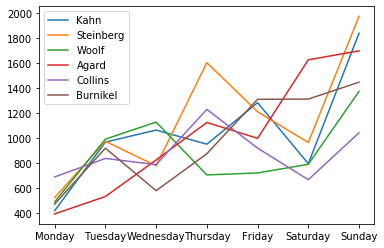

In [386]:
authors.plot.line()

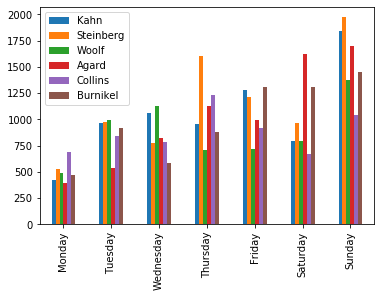

In [388]:
authors.plot.bar()

In [460]:
df17 = pd.read_csv('Data/puzzle17.csv')

In [461]:
df18 = pd.read_csv('Data/puzzle18.csv')

In [462]:
solve17 = df17['solve_secs'].to_list()
solve18 = df18['solve_secs'].to_list()

In [463]:
solve17

[2033.0,
 530.0,
 630.0,
 1217.0,
 1091.0,
 1348.0,
 1243.0,
 1904.0,
 462.0,
 926.0,
 1161.0,
 871.0,
 1391.0,
 1401.0,
 1814.0,
 654.0,
 832.0,
 519.0,
 1385.0,
 1376.0,
 1451.0,
 2318.0,
 576.0,
 842.0,
 1281.0,
 1144.0,
 1043.0,
 1475.0,
 1715.0,
 604.0,
 1550.0,
 868.0,
 1221.0,
 1346.0,
 1341.0,
 1820.0,
 545.0,
 814.0,
 1193.0,
 1097.0,
 854.0,
 1483.0,
 2109.0,
 688.0,
 881.0,
 827.0,
 1068.0,
 1393.0,
 1425.0,
 2065.0,
 805.0,
 623.0,
 844.0,
 852.0,
 1296.0,
 1372.0,
 1417.0,
 486.0,
 1028.0,
 660.0,
 1253.0,
 1367.0,
 1312.0,
 2475.0,
 770.0,
 673.0,
 1044.0,
 800.0,
 1366.0,
 1076.0,
 2156.0,
 514.0,
 956.0,
 1087.0,
 1021.0,
 1299.0,
 1422.0,
 2080.0,
 628.0,
 1497.0,
 1698.0,
 1316.0,
 1466.0,
 1151.0,
 2093.0,
 625.0,
 743.0,
 969.0,
 1374.0,
 2759.0,
 12399.0,
 10315.0,
 578.0,
 886.0,
 746.0,
 1208.0,
 1533.0,
 1978.0,
 7301.0,
 557.0,
 812.0,
 1150.0,
 1467.0,
 1200.0,
 1244.0,
 2519.0,
 759.0,
 976.0,
 1346.0,
 1860.0,
 1471.0,
 1395.0,
 2294.0,
 531.0,
 1073.0,
 950

In [400]:
Sun17 = df[df['day'] == 'Sunday']
Mon17 = df[df['day'] == 'Monday']
Tues17 = df[df['day'] == 'Tuesday']
Wed17 = df[df['day'] == 'Wednesday']
Thurs17 = df[df['day'] == 'Thursday']
Fri17 = df[df['day'] == 'Friday']
Sat17 = df[df['day'] == 'Saturday']

In [403]:
Sun18 = df[df['day'] == 'Sunday']
Mon18 = df[df['day'] == 'Monday']
Tues18 = df[df['day'] == 'Tuesday']
Wed18 = df[df['day'] == 'Wednesday']
Thurs18 = df[df['day'] == 'Thursday']
Fri18 = df[df['day'] == 'Friday']
Sat18 = df[df['day'] == 'Saturday']

In [409]:
sunsolve17 = Sun17['solve_secs'].to_list()
monsolve17 = Mon17['solve_secs'].to_list()
tuessolve17 = Tues17['solve_secs'].to_list()
wedsolve17 = Wed17['solve_secs'].to_list()
thurssolve17 = Thurs17['solve_secs'].to_list()
frisolve17 = Fri17['solve_secs'].to_list()
satsolve17 = Sat17['solve_secs'].to_list()


In [410]:
sunsolve18 = Sun18['solve_secs'].to_list()
monsolve18 = Mon18['solve_secs'].to_list()
tuessolve18 = Tues18['solve_secs'].to_list()
wedsolve18 = Wed18['solve_secs'].to_list()
thurssolve18 = Thurs18['solve_secs'].to_list()
frisolve18 = Fri18['solve_secs'].to_list()
satsolve18 = Sat18['solve_secs'].to_list()

In [411]:
print (sunsolve17)
print (sunsolve18)

[2033.0, 1904.0, 1814.0, 2318.0, 1715.0, 1820.0, 2109.0, 2065.0, 1417.0, 2475.0, 2156.0, 2080.0, 2093.0, 10315.0, 7301.0, 2519.0, 2294.0, 2798.0, 1949.0, 2621.0, 5914.0, 6442.0, 2641.0, 1764.0, 4436.0, 2825.0, 2835.0, 2511.0, 3397.0, 3493.0, 3036.0, 3447.0, 3350.0, 3372.0, 3587.0, 4385.0, 2943.0, 4368.0, 3579.0, 5144.0, 3902.0, 3235.0, 2487.0, 2630.0, 3873.0, 2750.0, 2719.0, 2267.0, 2723.0, 2622.0, 2213.0, 2175.0, 2188.0]
[3657.0, 2963.0, 2485.0, 2697.0, 2261.0, 2312.0, 2469.0, 3104.0, 3012.0, 2196.0, 2023.0, 2601.0, 2755.0, 2884.0, 2515.0, 853.0, 2192.0, 2651.0, 1577.0, 2122.0, 1904.0, 2167.0, 2630.0, 2596.0, 2614.0, 1978.0, 2482.0, 3543.0, 2854.0, 3697.0, 2432.0, 1922.0, 3382.0, 2241.0, 1422.0, 2891.0, 1944.0, 3456.0, 1625.0, 2105.0, 1919.0, 1406.0, 1633.0, 2047.0, 2394.0, 1909.0, 1745.0, 1670.0, 2467.0, 1946.0, 1427.0, 1945.0]


In [502]:

%matplotlib inline

import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.style.use('ggplot')

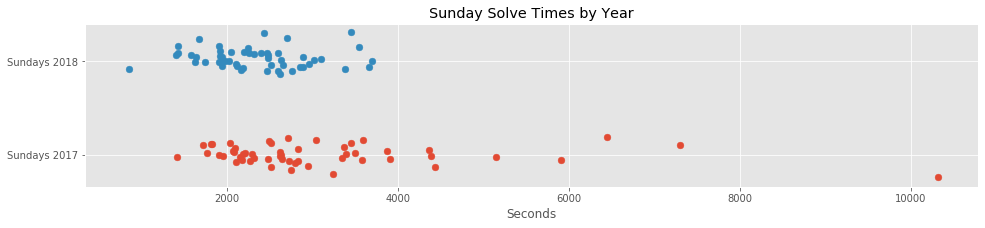

In [503]:

fig, ax = plt.subplots(1, figsize=(16, 3))

ax.scatter(sunsolve17, np.repeat(0, len(sunsolve17)) + np.random.normal(0, 0.1, len(sunsolve17)), s=45)
ax.scatter(sunsolve18, np.repeat(1, len(sunsolve18)) + np.random.normal(0, 0.1, len(sunsolve18)), s=45)
ax.set_yticks([0, 1])
ax.set_yticklabels(["Sundays 2017", "Sundays 2018"])
ax.set_xlabel('Seconds')
ax.set_title('Sunday Solve Times by Year')

plt.savefig('SundaySolves17_18.png')

Text(0.5, 1.0, 'Solve Times by Year')

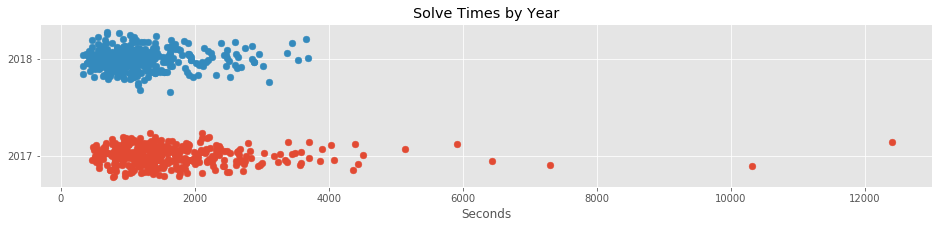

In [514]:

fig, ax = plt.subplots(1, figsize=(16, 3))

ax.scatter(solve17, np.repeat(0, len(solve17)) + np.random.normal(0, 0.1, len(solve17)), s=45)
ax.scatter(solve18, np.repeat(1, len(solve18)) + np.random.normal(0, 0.1, len(solve18)), s=45)
ax.set_yticks([0, 1])
ax.set_yticklabels(["2017", "2018"])
ax.set_xlabel('Seconds')
ax.set_title('Solve Times by Year')


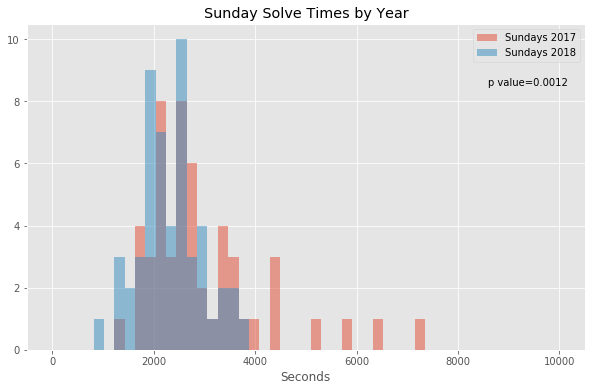

In [535]:

bins = np.linspace(0, 10000, 50)

x = sunsolve17
y = sunsolve18

fig, ax = plt.subplots(1, figsize=(10, 6))
ax.hist(x, bins, alpha = .5, label = 'Sundays 2017')
ax.hist(y, bins, alpha = .5, label = 'Sundays 2018')
ax.legend(loc = 'upper right')
ax.text(8600, 8.5, "p value=0.0012")
ax.set_xlabel('Seconds')
ax.set_title('Sunday Solve Times by Year')

plt.show()



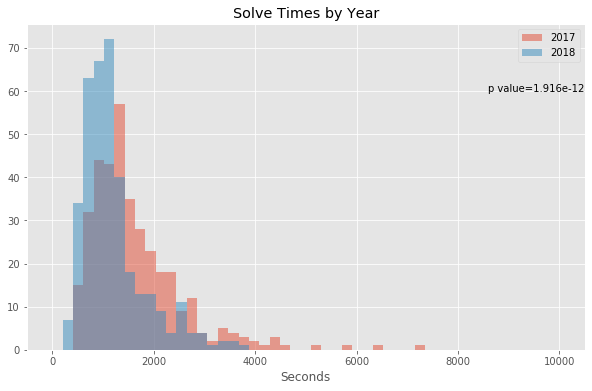

<Figure size 432x288 with 0 Axes>

In [532]:
bins = np.linspace(0, 10000, 50)

x = solve17
y = solve18

fig, ax = plt.subplots(1, figsize=(10, 6))
ax.hist(x, bins, alpha = .5, label = '2017')
ax.hist(y, bins, alpha = .5, label = '2018')
ax.legend(loc = 'upper right')
ax.text(8600, 60, "p value=1.916e-12")
ax.set_xlabel('Seconds')
ax.set_title('Solve Times by Year')

plt.show()


plt.savefig('Solves_hist_17_18.png')

In [422]:

def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)

In [450]:
test_statistic = welch_test_statistic(sunsolve18, sunsolve17)
print("Welch Test Statistic: {:2.2f}".format(test_statistic))

Welch Test Statistic: -3.39


Text(0.5, 1.0, "Student's t-distributions")

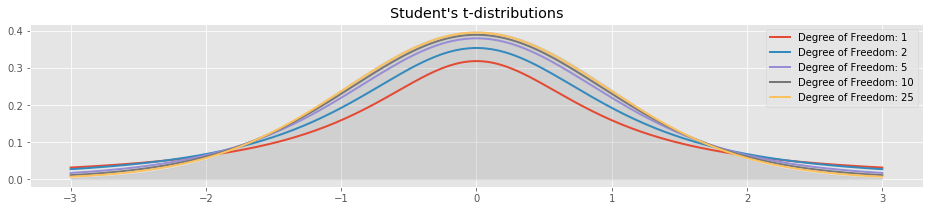

In [451]:
dfs = [1, 2, 5, 10, 25]
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))

normal = stats.norm(0, 1)
ax.fill_between(x, normal.pdf(x), color="grey", alpha=0.2)
for df in dfs:
    students = stats.t(df)
    ax.plot(x, students.pdf(x), linewidth=2,
            label="Degree of Freedom: {}".format(df))
ax.legend()
ax.set_title("Student's t-distributions")

In [452]:
def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df

In [453]:
df = welch_satterhwaithe_df(sunsolve18, sunsolve17)
print("Degrees of Freedom for Welch's Test: {:2.2f}".format(df))

Degrees of Freedom for Welch's Test: 68.07


Text(0.5, 1.0, "Distribution of Welch's Test Statistic Under the Null Hypothesis")

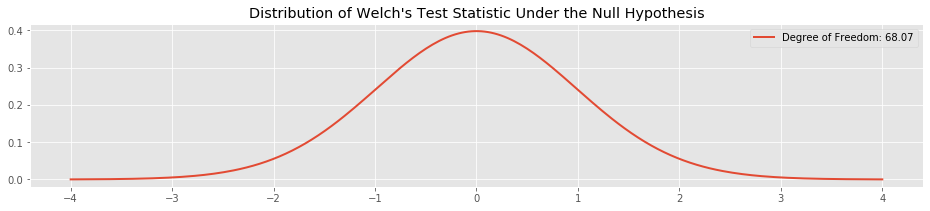

In [454]:
x = np.linspace(-4, 4, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
students = stats.t(df)
ax.plot(x, students.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df))
ax.legend()
ax.set_title("Distribution of Welch's Test Statistic Under the Null Hypothesis")

Text(0.5, 1.0, 'p-value Region')

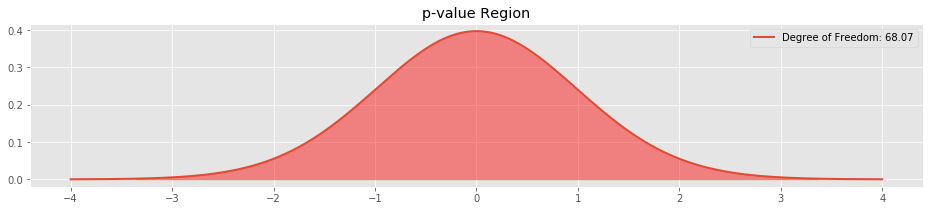

In [441]:
x = np.linspace(-4, 4, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
students = stats.t(df)
ax.plot(x, students.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df))
_ = ax.fill_between(x, students.pdf(x), where=(x >= -test_statistic), color="red", alpha=0.25)
_ = ax.fill_between(x, students.pdf(x), where=(x <= test_statistic), color="red", alpha=0.25)
ax.legend()
ax.set_title("p-value Region")

In [444]:

p_value = students.cdf(test_statistic) + (1 - students.cdf(-test_statistic))
print("p-value for different average solve time: {:2.2f}".format(p_value))

p-value for different average solve time: 2.00


In [447]:
test_statistic = welch_test_statistic(sunsolve18, sunsolve17)

p_value = 1 - students.cdf(test_statistic)
print("p-value for 2018 Sunday solves times greater than 2017: {:2.3f}".format(p_value))

p-value for 2018 Sunday solves times greater than 2017: 0.999


In [449]:
stats.ttest_ind(sunsolve18, sunsolve17)

Ttest_indResult(statistic=-3.331134426040161, pvalue=0.0012016080697833218)

In [490]:
stats.ttest_ind(solve18, solve17)

Ttest_indResult(statistic=-7.1645121540767756, pvalue=1.9165616778579024e-12)